In [1]:
import pandas as pd
import numpy as np


In [82]:
df_normal = pd.read_csv("archive/ptbdb_normal.csv", header = None)
df_abnormal = pd.read_csv("archive/ptbdb_abnormal.csv", header = None)

In [83]:
print(f"Normal dataset size is {df_normal.shape}")
df_normal.head()

Normal dataset size is (4046, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
print(f'Abnormal dataset size is {df_abnormal.shape}')
df_abnormal.head()

Abnormal dataset size is (10506, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [86]:
#Checking if last column is for classification:
print(f"Every element in the last column  of df_normal is equal to 0: {df_normal[187].sum() == 0}")
print(f"Every element in the last column  of df_abnormal is equal to 1: {df_abnormal[187].sum() == df_abnormal.shape[0]}")

Every element in the last column  of df_normal is equal to 0: True
Every element in the last column  of df_abnormal is equal to 1: True


In [87]:
df = pd.concat([df_normal, df_abnormal])
print(df.shape)

(14552, 188)


In [89]:
# Separating features and target 

X = np.array(df[df.columns[:-1]])
print(f'The feature space is of shape: {X.shape}')
Y= np.array(df[187])
print(f'The target is of shape: {Y.shape}')

The feature space is of shape: (14552, 187)
The target is of shape: (14552,)


In [40]:
z = [12,13,15]
print(len(z))
print(z[0])
print(z[-1])
print(z[-1]- z[0] + 1)

3
12
15
4


In [90]:
def findFirstIndexOfPadding(a):
    """Input: a - an np array of shape (n,)
       Output: theIndex - the index where the zero padding of 
               the np array a starts. If the array a does not end in 0 
               then return value is None.
       """
    zeroLoc = np.where(a ==0)[0]
    if (zeroLoc[-1] +1) != len(a):
        theIndex = None
    else:
        theIndex = -2
        while theIndex == -2:
            if (zeroLoc[-1] - zeroLoc[0] + 1) == len(zeroLoc):
                theIndex = zeroLoc[0]
            elif len(zeroLoc) == 2:
                theIndex = zeroLoc[-1]
            else:
                zeroLoc = zeroLoc[1:]       
    return theIndex

In [91]:
#Finding smallest first index of padding:
firstIndicesOfPadding = [findFirstIndexOfPadding(row) for row in X if findFirstIndexOfPadding(row) is not None ]


In [95]:
firstIndicesOfPadding.sort()
# firstIndicesOfPadding

In [93]:
print(f'There were {len(firstIndicesOfPadding)} rows in X that were padded.')
print(f'There are {X.shape[0]} rows in total in X.')

There were 14552 rows in X that were padded.
There are 14552 rows in total in X.


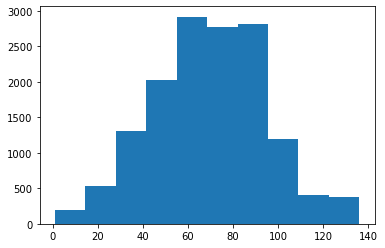

In [110]:
paddingLengths = [X.shape[1] - n for n in firstIndicesOfPadding]
paddingLengths[-10:]
import matplotlib.pyplot as plt
plt.hist(paddingLengths)
plt.show()

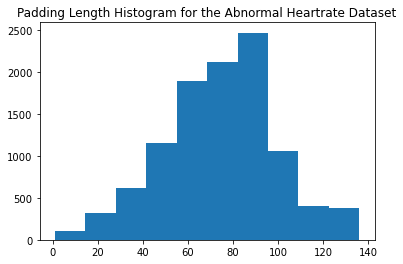

In [134]:
X_abnormal = np.array(df_abnormal[df.columns[:-1]])
X_abnormal.shape
firstZeroIndex_abnormal = [findFirstIndexOfPadding(row) for row in X_abnormal if findFirstIndexOfPadding(row) is not None ]
firstZeroIndex_abnormal.sort()
paddingLengths_abnormal = [X_abnormal.shape[1] - n for n in firstZeroIndex_abnormal]
import matplotlib.pyplot as plt
plt.hist(paddingLengths_abnormal)
plt.title("Histogram of Padding Length for the Abnormal Heartrate Dataset")
plt.show()

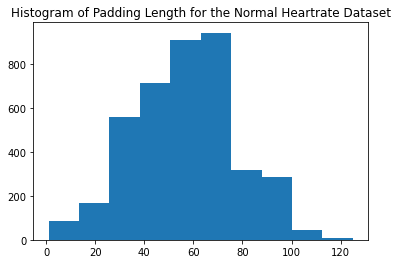

In [135]:
X_normal = np.array(df_normal[df.columns[:-1]])
X_normal.shape
firstZeroIndex_normal = [findFirstIndexOfPadding(row) for row in X_normal if findFirstIndexOfPadding(row) is not None ]
firstZeroIndex_normal.sort()
paddingLengths_normal = [X_normal.shape[1] - n for n in firstZeroIndex_normal]
import matplotlib.pyplot as plt
plt.hist(paddingLengths_normal)
plt.title("Histogram of Padding Length for the Normal Heartrate Dataset")
plt.show()

In [164]:
#finding indices of rows with padding shorter than paddingLength
paddingLength = 86
cutOffIndex  = 187 - paddingLength
cutOffIndex

rowIndices= [i for i in range(X.shape[0]) \
             if (findFirstIndexOfPadding(X[i,:]) is not None ) & (findFirstIndexOfPadding(X[i,:]) > cutOffIndex)]
print(f"The number of rows with padding length shorter than {paddingLength} is {len(rowIndices)}.")
print(f"The fraction of abnormal rows out of all the rows with padding length shorter than {paddingLength} is {np.sum(Y[rowIndices])/Y.shape[0]}")
print(f"The fraction of normal rows out of all the rows with padding length shorter than {paddingLength} is {(Y.shape[0]- np.sum(Y[rowIndices]))/Y.shape[0]}")

The number of rows with padding length shorter than 86 is 10822.
The fraction of abnormal rows out of all the rows with padding length shorter than 86 is 0.4894172622319956
The fraction of normal rows out of all the rows with padding length shorter than 86 is 0.5105827377680044


In [166]:
X_86 = X[rowIndices,:]
Y_86 = Y[rowIndices]
print(X_86.shape)
print(Y_86.shape)

(10822, 187)
(10822,)


In [167]:
from sklearn.model_selection import train_test_split
# Set the random state to 42
Xtrain, Xtest, ytrain, ytest =train_test_split(X_86, Y_86, test_size=0.2, random_state=42)

In [173]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
model = SVC(kernel='rbf', class_weight = "balanced")
model.fit(Xtrain, ytrain)

SVC(class_weight='balanced')

In [174]:
yfit = model.predict(Xtest)

In [176]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82       751
         1.0       0.96      0.83      0.89      1414

    accuracy                           0.86      2165
   macro avg       0.85      0.88      0.85      2165
weighted avg       0.88      0.86      0.86      2165



In [177]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

In [179]:
cm= confusion_matrix(ytest,yfit )
acc  = accuracy(ytest,yfit)
rec  = recall(ytest,yfit )
prec = precision(ytest,yfit )
f1   = f1_score(ytest,yfit )
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cm)

Accuracy = 0.8614318706697459, Precision = 0.955810147299509, Recall = 0.826025459688826, F1-score = 0.8861911987860395
Confusion Matrix is:
[[ 697   54]
 [ 246 1168]]
